In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts as darts

In [2]:
#load csv file
df = pd.read_csv('test_nn_c.csv', sep=';')

#show first 5 rows
df.head()

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
0,05_12_2022_09_05_31,93.624000,64.262000,64.138000,74.27533333333334,0.0,0.000000,35.68666666666667,0.004667,49.976,0.091333,0.0,0.0,0.000000,0.000000,76.794000,99.733333,99.733333,99.733333
1,05_12_2022_09_21_59,89.998667,65.000000,64.523333,71.158,0.03933333333333333,20.972000,38.0,0.000000,46.0,0.004667,12.974,0.03933333333333333,0.046667,0.205333,76.144667,99.666667,99.600000,99.600000
2,05_12_2022_09_27_23,89.638000,64.776000,64.783333,70.81066666666666,0.0,20.958000,37.924,0.000000,45.89666666666667,0.000000,12.934666666666667,0.0,0.000000,0.000000,75.714667,99.600000,99.733333,99.612667
3,05_12_2022_09_32_47,89.938000,64.961333,65.000000,71.0,0.0,20.999333,38.0,0.000000,45.92066666666667,0.000000,12.822,0.0,0.000000,0.000000,76.000000,100.000000,100.000000,100.000000
4,05_12_2022_09_38_11,89.138667,64.391333,64.263333,71.41066666666667,0.059333333333333335,20.947333,37.898666666666664,0.022667,43.67333333333333,0.000000,12.708,0.032,0.020667,0.718667,75.825333,99.885333,99.800000,98.348667


In [3]:
def series_make(index):
    #load new variable with only the first and second column
    column1 = df.iloc[:,0]
    number_fill = index
    column2 = df.iloc[:,number_fill]
    df2 = pd.DataFrame({'Time': column1, 'F'+str(number_fill): column2})
    # Get name of the second column
    col2name = df2.columns[1]
    # Convert the second column to a float type and set it as the time series values
    values = df[col2name].astype(float).values
    # Create a TimeSeries object from the values, using the Time column as the time index (first column)
    time_index = darts.TimeSeries.from_times_and_values(df2.index, values)
    # Save as a TimeSeries object
    series = darts.TimeSeries.from_times_and_values(df2.index, values)

    return series

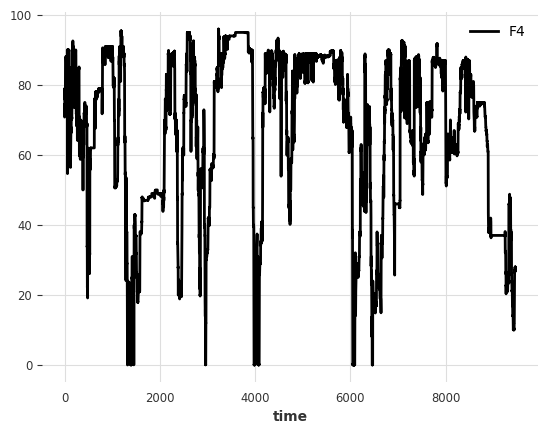

In [5]:
serie_num = 4

series = series_make(serie_num)

series.plot(label='F'+serie_num.__str__())
plt.legend()

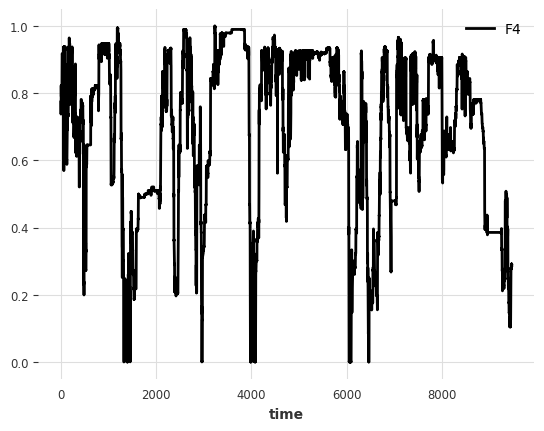

In [6]:
from darts.dataprocessing.transformers import Scaler
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

series_scaled.plot(label='F'+serie_num.__str__())
plt.legend()

In [41]:
#read all the values and calculate the mean
mean = series_scaled.values().mean()
print("Mean:")
print(mean)

#set scaler
thresh = 0.29

#create threshold with the mean
threshold = mean * thresh
print("Threshold:")
print(threshold)

Mean:
0.6953836988813878
Threshold:
0.20166127267560247


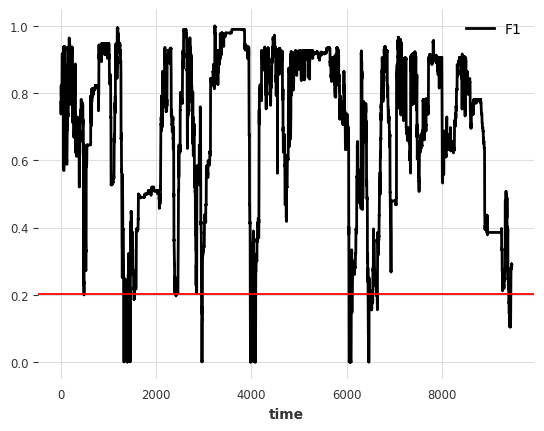

In [42]:
#show the threshold line in the graph
series_scaled.plot(label='F1')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.legend();

In [ ]:
from darts import TimeSeries

# Function to calculate the threshold for a given index
def get_number_threshold_m(series, index , th):
    # mean of all values up to the current index
    mean = series.values()[:index+1].mean()

    return mean * th

# Function to calculate the threshold for a given range
def get_th_m(series_scaled, th):

    # Assuming series_scaled is a Darts TimeSeries
    thresh_series = series_scaled.copy()

    # Create a new list to store the modified values
    modified_values = []

    # Go through each value and modify it using the get_number_threshold function
    for index, value in enumerate(thresh_series.values()):
        new_value = get_number_threshold_m(series_scaled, index, th)
        modified_values.append(new_value)

    # Create a new TimeSeries with the modified values and the same time index as the original TimeSeries
    new_thresh_series = TimeSeries.from_times_and_values(thresh_series.time_index, modified_values)

    return new_thresh_series

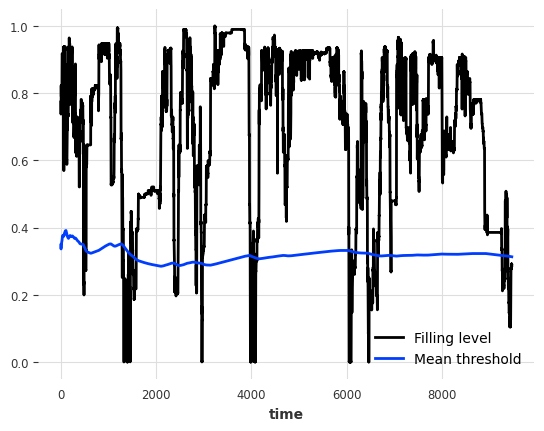

In [53]:
#show series and thresh_series in the same graph
series_scaled.plot(label='Filling level')
thresh = 0.45
new_thresh_series = get_th_m(series_scaled, thresh)
new_thresh_series.plot(label='Mean threshold')
plt.legend()


In [50]:
from darts import TimeSeries

# Function to calculate the threshold for a given index
def get_number_threshold(series, x, index , th):
    if index < x:
        index = x
    # mean of the last x values including the index
    mean = series.values()[index-(x-1):index+1].mean()

    return mean * th

# Function to calculate the threshold for a given range
def get_th(series_scaled, range, th):

    # Assuming series_scaled is a Darts TimeSeries
    thresh_series = series_scaled.copy()

    # Create a new list to store the modified values
    modified_values = []

    # Go through each value and modify it using the get_number_threshold function
    for index, value in enumerate(thresh_series.values()):
        new_value = get_number_threshold(series_scaled, range, index, th)
        modified_values.append(new_value)

    # Create a new TimeSeries with the modified values and the same time index as the original TimeSeries
    new_thresh_series = TimeSeries.from_times_and_values(thresh_series.time_index, modified_values)

    return new_thresh_series

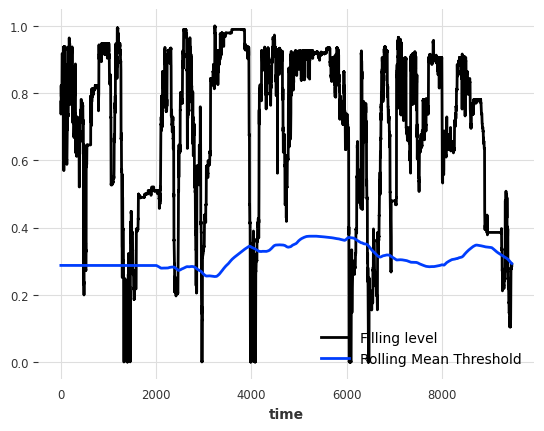

In [57]:
#show series and thresh_series in the same graph
series_scaled.plot(label='Filling level')
window = 2000
thresh = 0.45
new_thresh_series = get_th(series_scaled, window, thresh)
new_thresh_series.plot(label='Rolling Mean Threshold')
plt.legend();

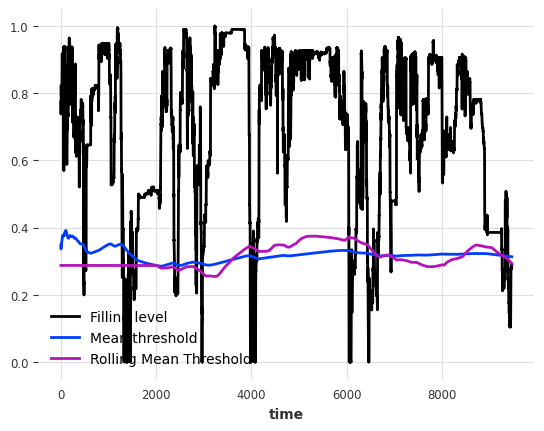

In [59]:
series_scaled.plot(label='Filling level')

thresh = 0.45
new_thresh_series = get_th_m(series_scaled, thresh)
new_thresh_series.plot(label='Mean threshold')

window = 2000
thresh = 0.45
new_thresh_series = get_th(series_scaled, window, thresh)
new_thresh_series.plot(label='Rolling Mean Threshold')

plt.legend()

In [25]:
#load darts model
from darts.models import NBEATSModel

model_path = 'weights/nbeats.pt'
model = NBEATSModel.load(model_path)

In [26]:
# Define your forecast horizon
forecast_horizon = 100  # For example, if you want to predict 12 time steps ahead

# Predict the next `forecast_horizon` time steps
forecast_scaled = model.predict(n=forecast_horizon, series=series_scaled)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/joseribeiro/anaconda3/envs/darts/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

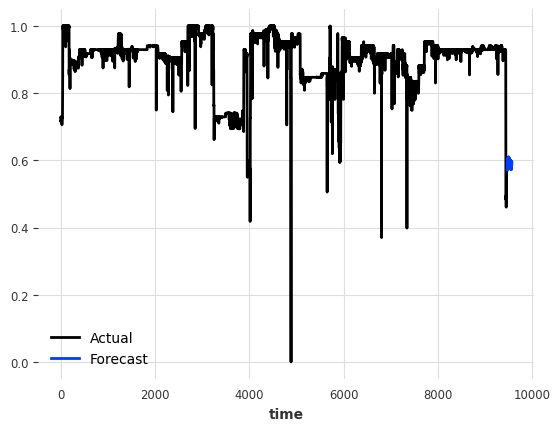

In [27]:
series_scaled.plot(label='Actual')
forecast_scaled.plot(label='Forecast')
plt.legend()
plt.show()


In [27]:
# now we're going to try a different threshold
# this time the threshold will be cumulative
# we will use the mean of previous values and it will keep on changing when more values keep on coming in
##a = 0
##sum = 0
# empty list with the size of the series
##threshold_list = [None] * len(series_scaled.values())
##for i in series_scaled.values():
##    print("Value number " + a.__str__() + ':')
##    print (i)
##    sum = sum + i
##    threshold_list[a] = sum
##    print("Sum:")
##    print (threshold_list[a])
##    a = a + 1
##    print(" ")
##    if a > 15:
##        break